<a href="https://colab.research.google.com/github/rbdlm/DesafioAluraChatBotGemini/blob/main/DesafioAluraImersaoIAChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando o SDK do Google

In [2]:
!pip install -q -U google-generativeai

# Set up your API key

In [9]:
import google.generativeai as genai
import os

from google.colab import userdata

from IPython.display import Markdown

api_key = userdata.get('SECRET_KEY')

genai.configure(api_key=api_key)

import PIL.Image
#from pathlib import Path
#import hashlib

# Listing available Gemini models

In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [5]:
generation_config = {
    "candidate_count":1,
    "temperature":0.5,
    "top_p": 0.95,
    "top_k": 0,
    "max_output_tokens": 8192
}

In [6]:
safety_settings = {
    "HARASSMENT": "BLOCK_NONE",
    "HATE": "BLOCK_NONE",
    "SEXUAL": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_NONE",
}

# Initialize the Generative Model

In [7]:
model = genai.GenerativeModel(model_name='gemini-pro-vision',
                              generation_config=generation_config,
                              safety_settings=safety_settings)


# Interactive with image inputs

Insira o caminho da imagem: /media/criancas.jpg


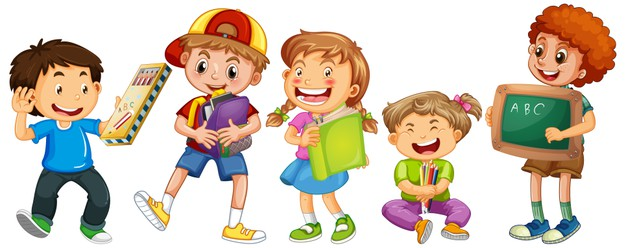

In [12]:
image_path = input('Insira o caminho da imagem: ')

if not os.path.isfile(image_path):
  raise SystemExit("Imagem invalida! ")

img = PIL.Image.open(image_path)
img

# Generate text

In [13]:
import textwrap

from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('-',' -')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _:True))

In [14]:
response = model.generate_content(img)
response.resolve()
to_markdown(response.text)

response = model.generate_content(["Descreva a imagem criando uma história infantil.", img], stream=True)
response.resolve()

to_markdown(response.text)


>  Era uma vez cinco crianças chamadas Alice, Bob, Carol, Dave e Eve. Eles eram todos amigos e adoravam brincar juntos. Um dia, eles estavam brincando no parque quando viram um grupo de crianças mais velhas欺负uma criança menor. As crianças mais velhas estavam chamando a criança menor de nomes e empurrando -a.
> 
> Alice, Bob, Carol, Dave e Eve sabiam que tinham que fazer alguma coisa para ajudar a criança menor. Eles se reuniram e decidiram falar com as crianças mais velhas.
> 
> "Deixem ele em paz", disse Alice.
> 
> "Vocês não têm o direito de intimidá -lo", disse Bob.
> 
> "Ele é tão pequeno e vocês são muito maiores", disse Carol.
> 
> "Vocês são covardes", disse Dave.
> 
> "Vocês são valentões", disse Eve.
> 
> As crianças mais velhas ficaram surpresas com a coragem de Alice, Bob, Carol, Dave e Eve. Elas não estavam acostumadas a serem confrontadas por crianças mais novas. Elas começaram a gaguejar e a se desculpar.
> 
> "Nós não queríamos dizer nada demais", disse uma das crianças mais velhas.
> 
> "Nós não sabíamos que ele era tão pequeno", disse outra criança mais velha.
> 
> "Nós sentimos muito", disse uma terceira criança mais velha.
> 
> As crianças mais velhas se desculparam com a criança menor e prometeram nunca mais intimidá -la. Alice, Bob, Carol, Dave e Eve estavam felizes por terem ajudado a criança menor. Eles sabiam que tinham feito a coisa certa.
> 
> As crianças mais velhas aprenderam uma lição naquele dia. Elas aprenderam que é errado intimidar os outros e que é importante ser gentil com todos. Alice, Bob, Carol, Dave e Eve também aprenderam uma lição. Eles aprenderam que é importante defender o que é certo, mesmo que seja assustador.